# Customer Behaviou Research:
 Clustering the customers in to four group based on the following features and explore the internal patterns of each groups.  


ID : Customer's ID.

Gender : Customer's Gender (Male/Female)

Ever_Married : Marrital Statue of the Customer (Yes/No)

Age : Customer's Age

Graduated : If the Customer is Graduated or No (Yes/No)

Work_Experience : Customer's Work Experience in Years

Spending Score : Spending Score of the Customer (Low,Average,High)



# Data Check

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.cluster import KMeans


In [14]:
df=pd.read_csv('Train.csv')
df=df.drop(['Var_1','Segmentation','ID'],axis=1) #Let's remove the unnecessary columns first 
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [15]:
#check missing value
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [16]:
## drop rows with missing values
df.dropna(inplace=True)

# Encoding categorical features

In [17]:
encoder = preprocessing.LabelEncoder()

In [18]:
#zip new dataset
Gender=encoder.fit_transform(df.iloc[:,0])
Ever_Married=encoder.fit_transform(df.iloc[:,1])
Graduated=encoder.fit_transform(df.iloc[:,3])
Profession=encoder.fit_transform(df.iloc[:,4])
Spending_Score=encoder.fit_transform(df.iloc[:,6])
convert=list(zip(Gender,Ever_Married,df['Age'],Graduated,Profession,df['Work_Experience'],Spending_Score,df['Family_Size']))
newdf = pd.DataFrame(convert, columns = ['Gender', 'Ever_Married', 'Age','Graduate','Profession','Work_Experience','Spending_Score','Family_Size'])


In [19]:
newdf

,Gender,Ever_Married,Age,Graduate,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,5,1.0,2,4.0
1,0,1,67,1,2,1.0,2,1.0
2,1,1,67,1,7,0.0,1,2.0
3,1,1,56,0,0,0.0,0,2.0
4,1,0,32,1,5,1.0,2,3.0
...,...,...,...,...,...,...,...,...
6713,1,1,41,1,0,0.0,1,5.0
6714,1,0,35,0,4,3.0,2,4.0
6715,0,0,33,1,5,1.0,2,1.0
6716,0,0,27,1,5,1.0,2,4.0


In [20]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
5,Male,Yes,56,No,Artist,0.0,Average,2.0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0
...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


# K-mean Clustering


In [21]:
X=newdf[:]

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)


C:\Users\V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [23]:
##cluster all samples into 4 groups
clusters = kmeans.predict(X)

# Exploring the patterns and insights in four customer groups

In [24]:
df['cluster'] = list(clusters)

Gender of customers across 4 clusters

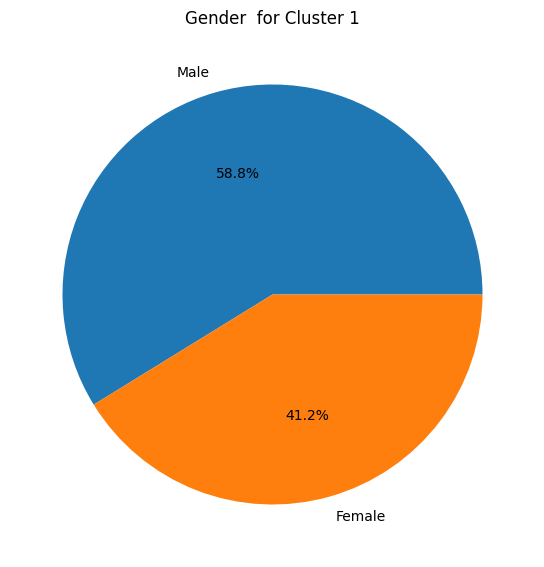

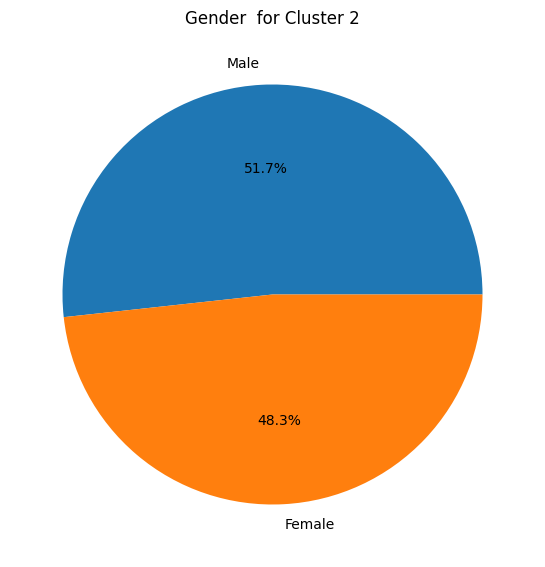

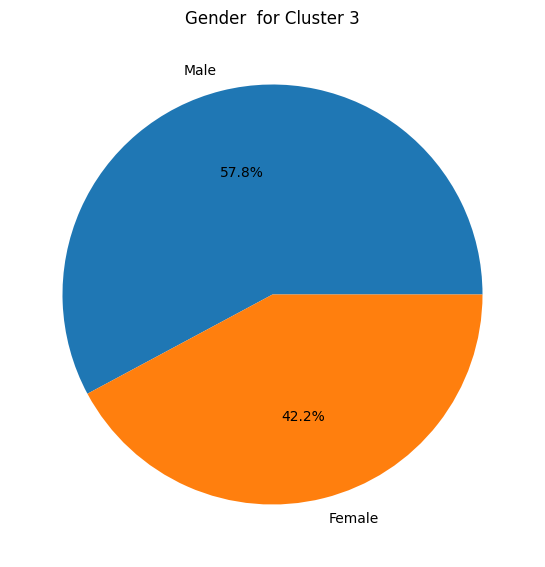

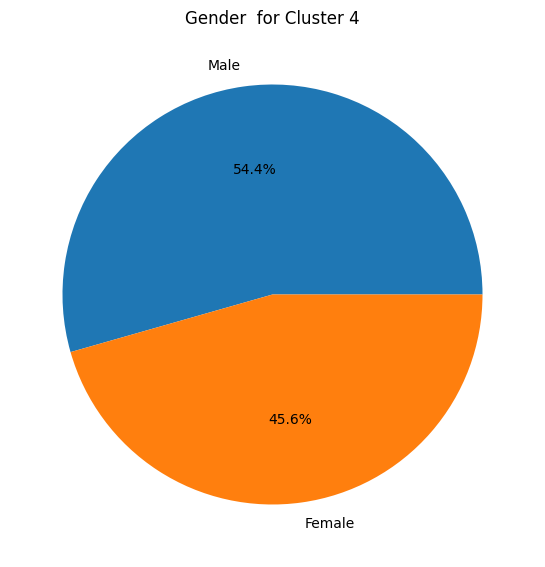

In [25]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = df.query("cluster=="+str(i)).Gender.value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Gender  for Cluster '+str(i+1))
    plt.show()

Marriage of customer across 4 clusters

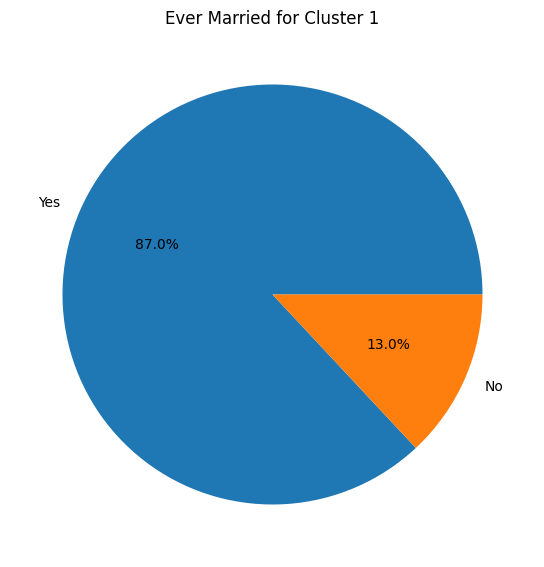

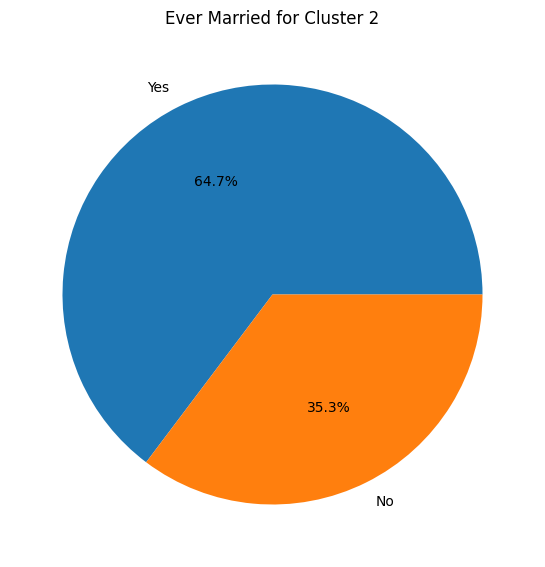

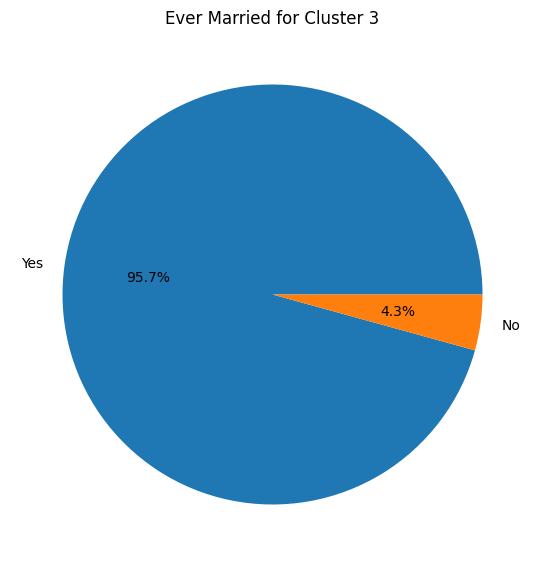

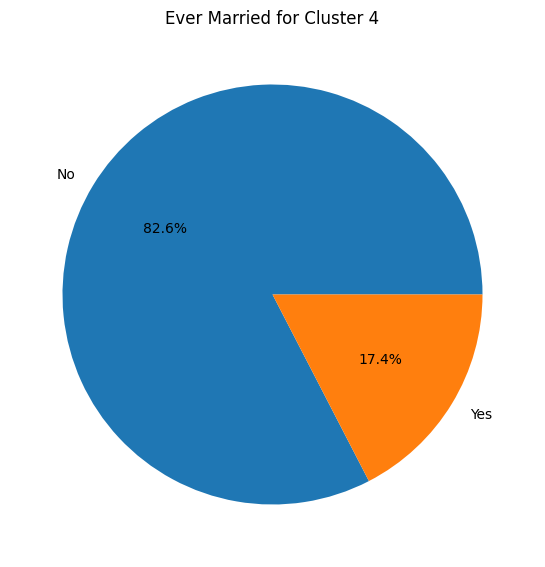

In [26]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = df.query("cluster=="+str(i)).Ever_Married.value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Ever Married for Cluster '+str(i+1))
    plt.show()

Age of customers across 4 clusters

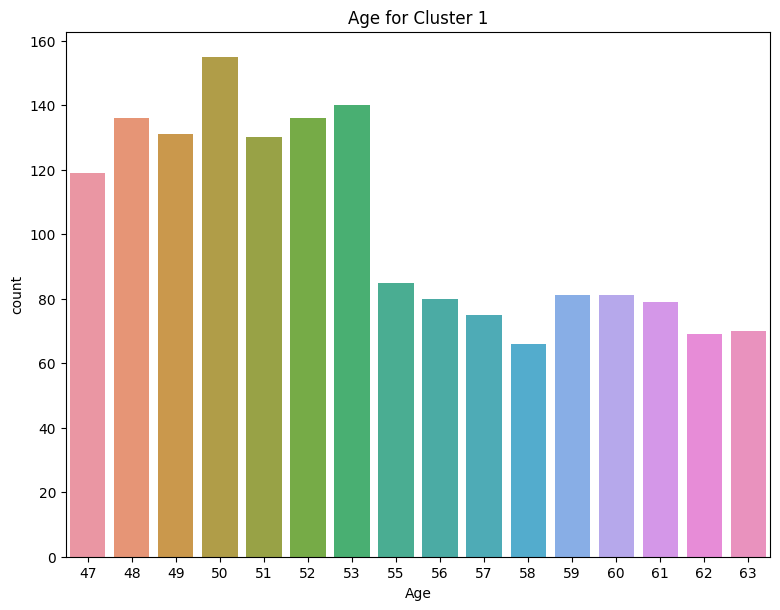

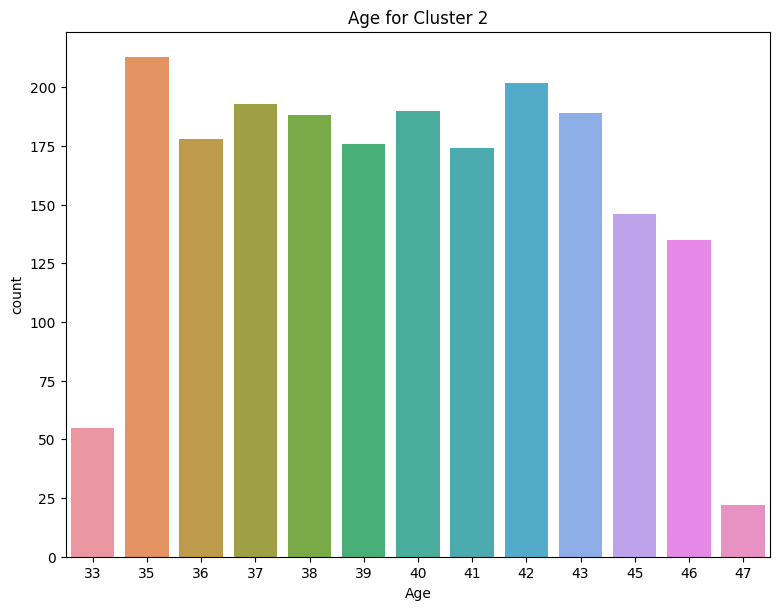

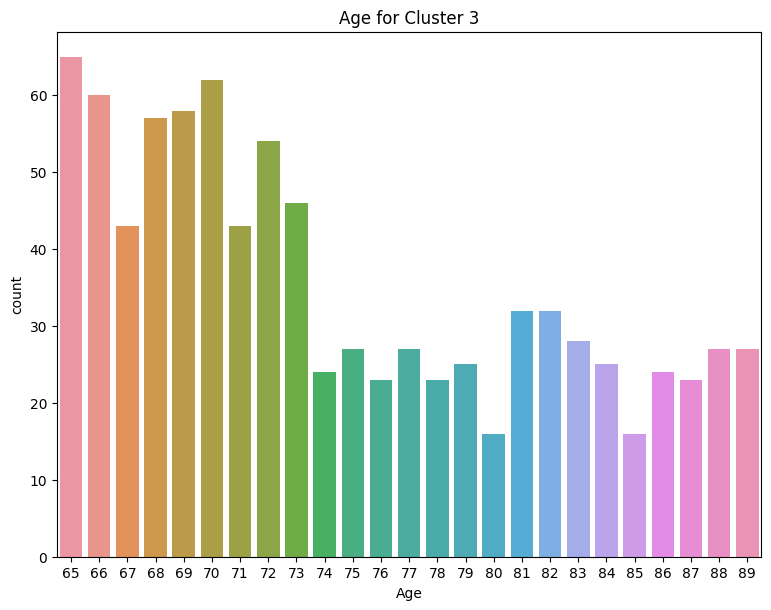

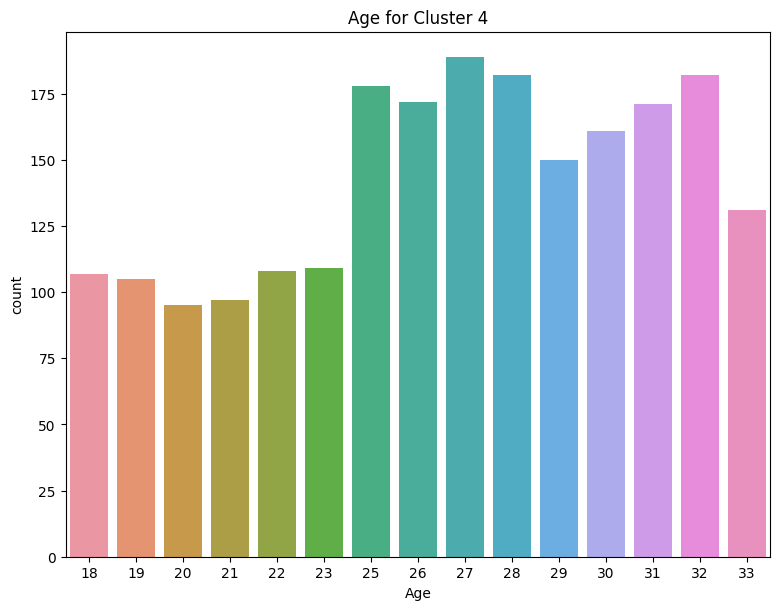

In [27]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    plt.title('Age for Cluster '+str(i+1))
    df.query("cluster=="+str(i))
    sns.countplot(df.query("cluster=="+str(i)),x="Age")

Graduation condition of customers across 4 clusters

Profession of customers across 4 clusters

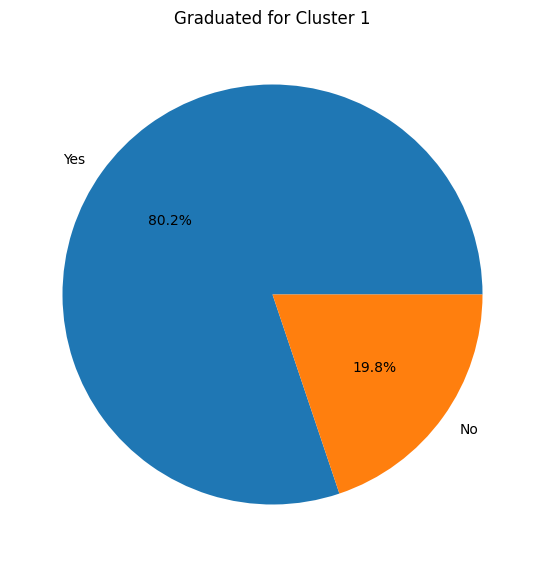

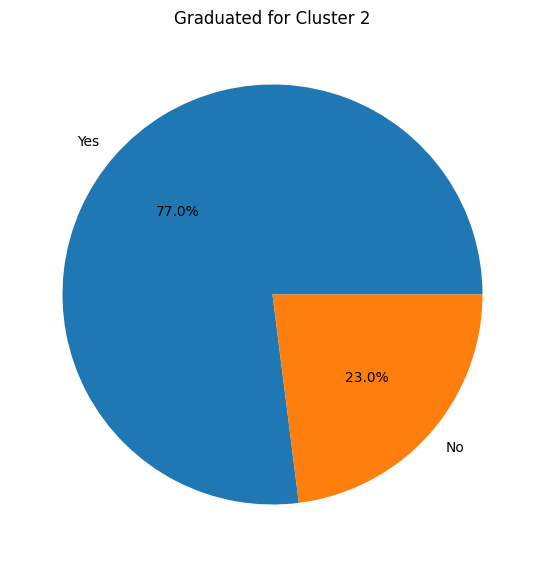

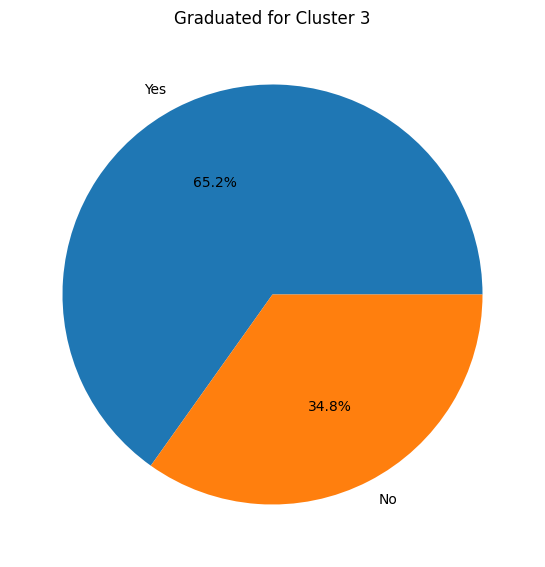

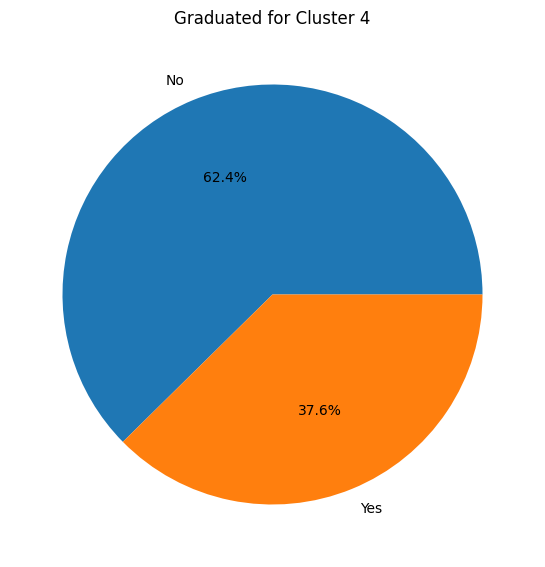

In [28]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = df.query("cluster=="+str(i)).Graduated.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Graduated for Cluster '+str(i+1))
    plt.show()

Profession of customers across 4 clusters

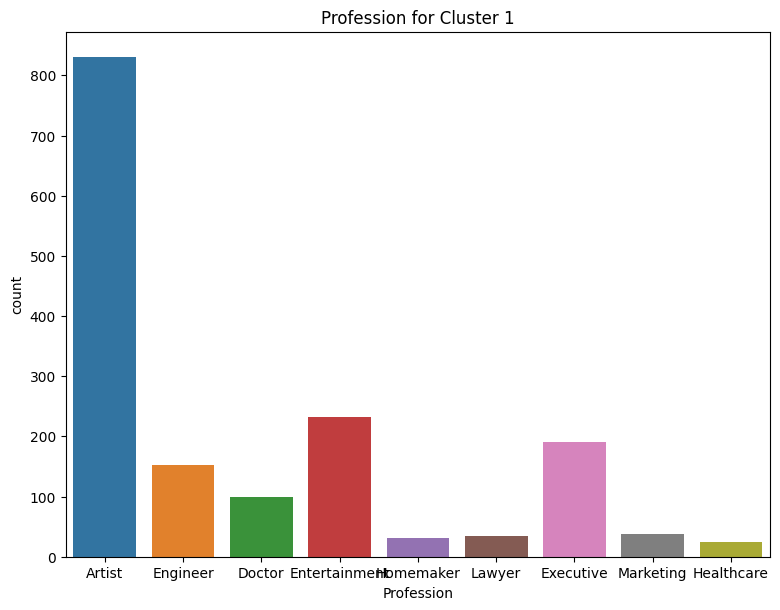

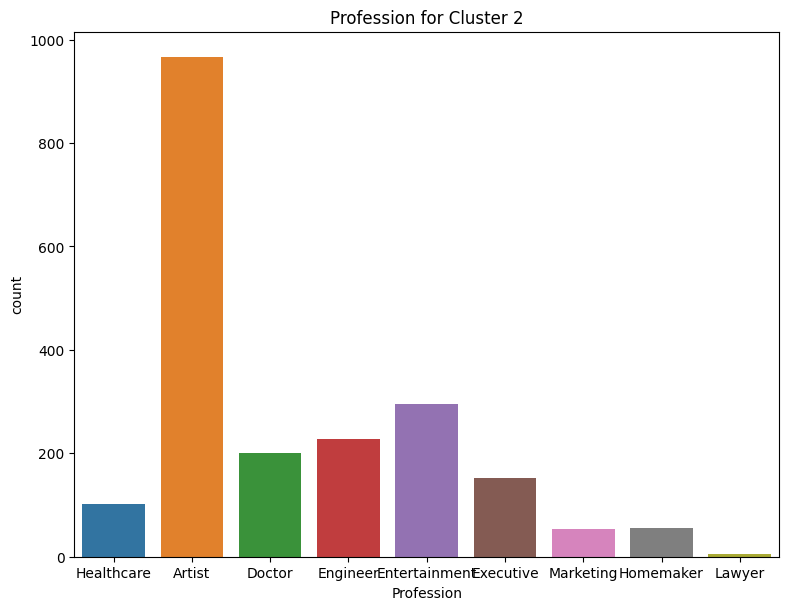

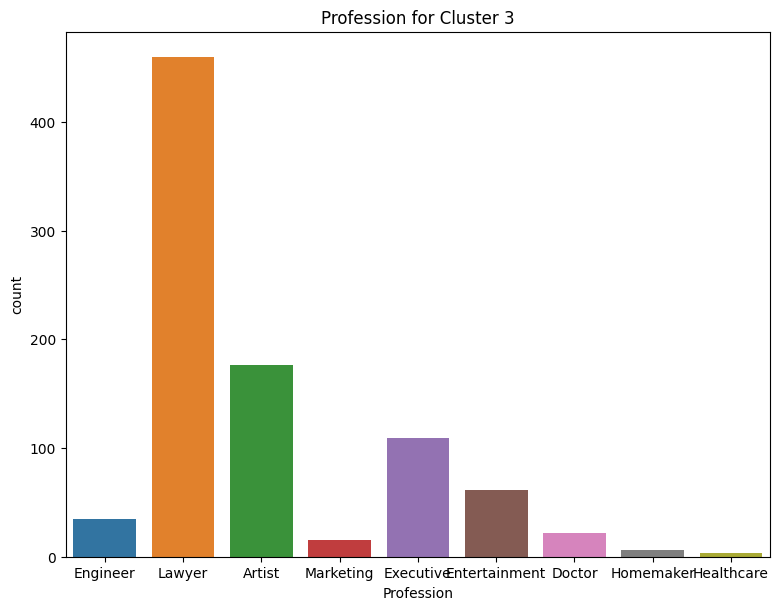

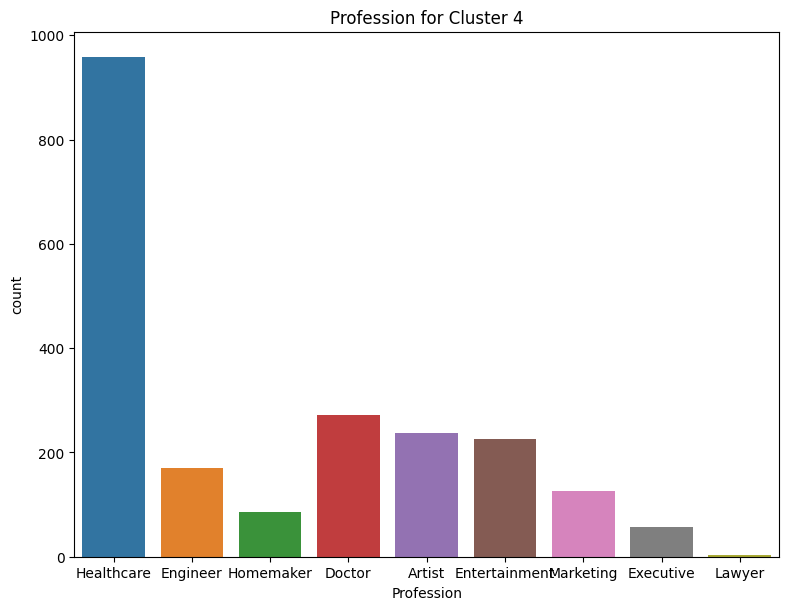

In [29]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    plt.title('Profession for Cluster '+str(i+1) )
    df.query("cluster=="+str(i))
    sns.countplot(df.query("cluster=="+str(i)),x="Profession")

Working experience of customers across 4 clusters

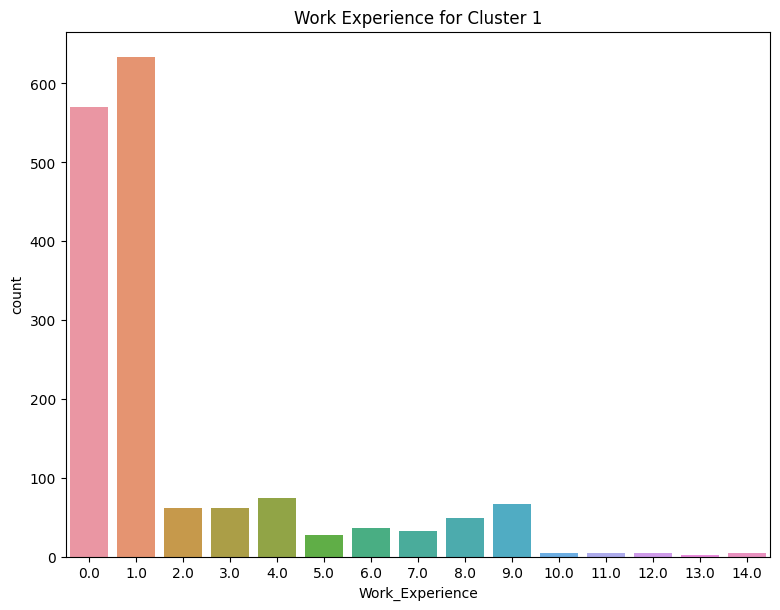

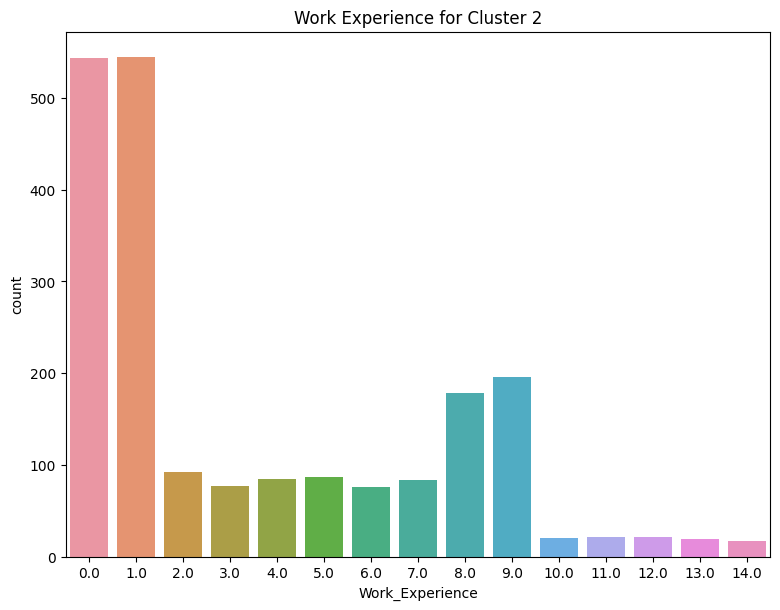

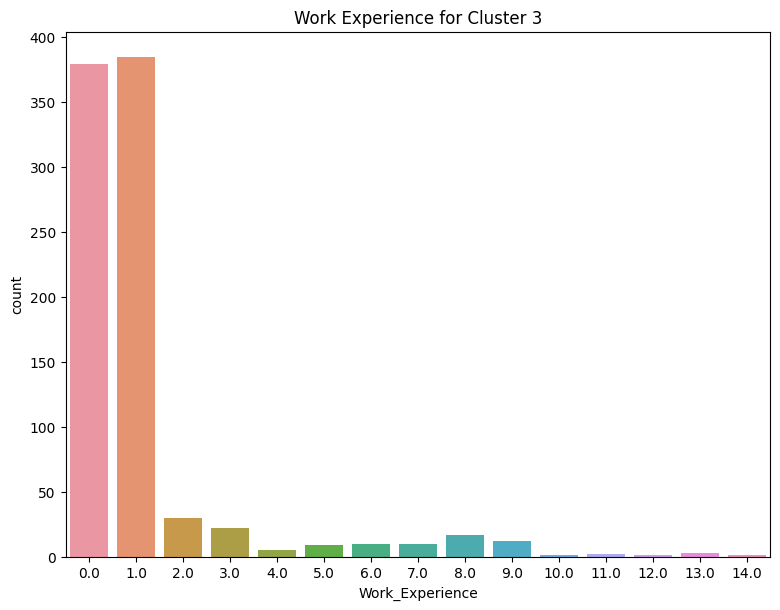

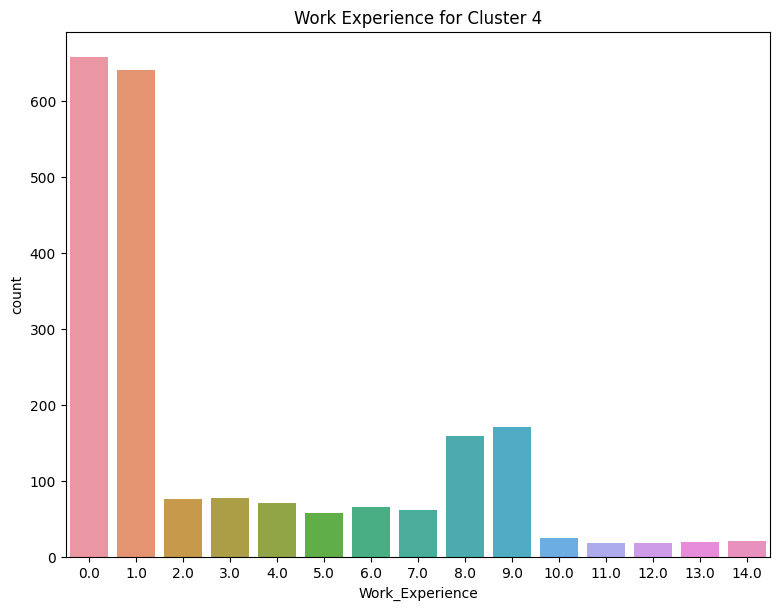

In [30]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    plt.title('Work Experience for Cluster '+str(i+1) )
    df.query("cluster=="+str(i))
    sns.countplot(df.query("cluster=="+str(i)),x="Work_Experience")

Spending of customers across 4 clusters

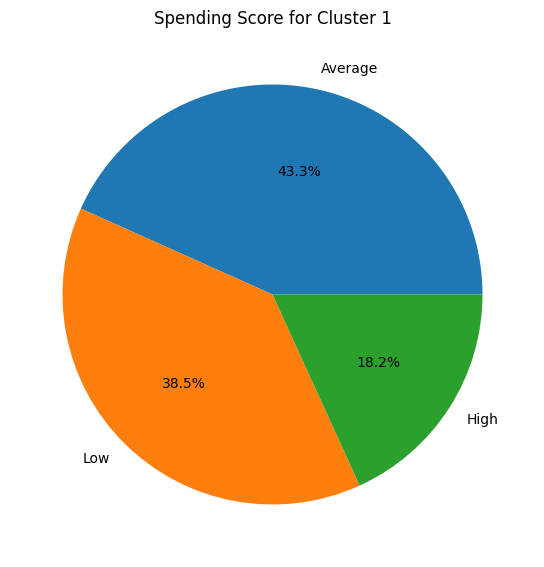

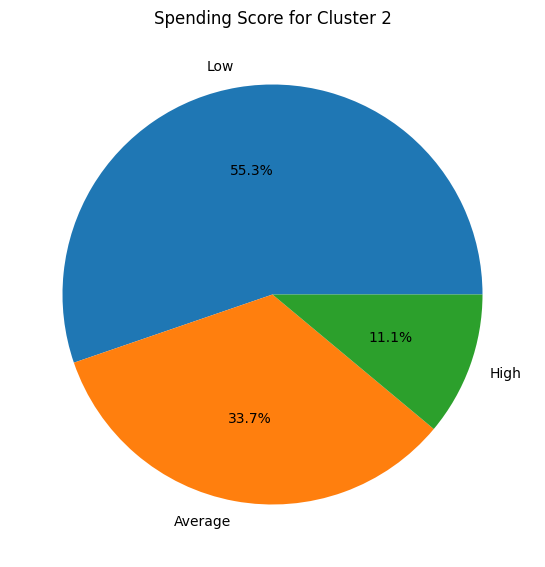

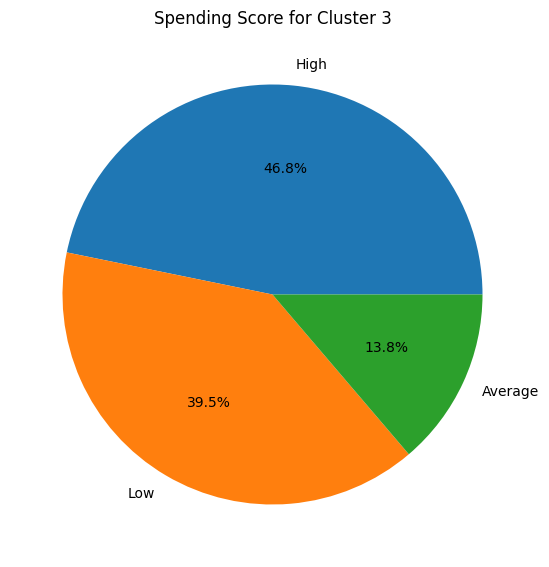

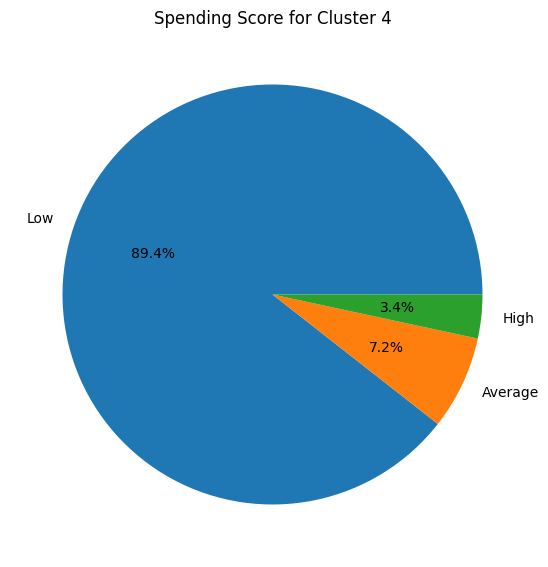

In [31]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = df.query("cluster=="+str(i)).Spending_Score.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Spending Score for Cluster '+str(i+1))
    plt.show()

Spending of customers across 4 clusters

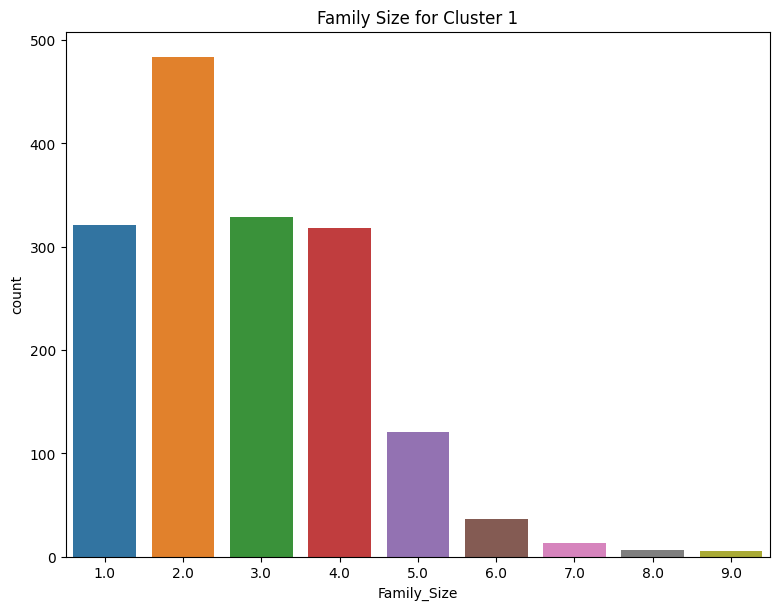

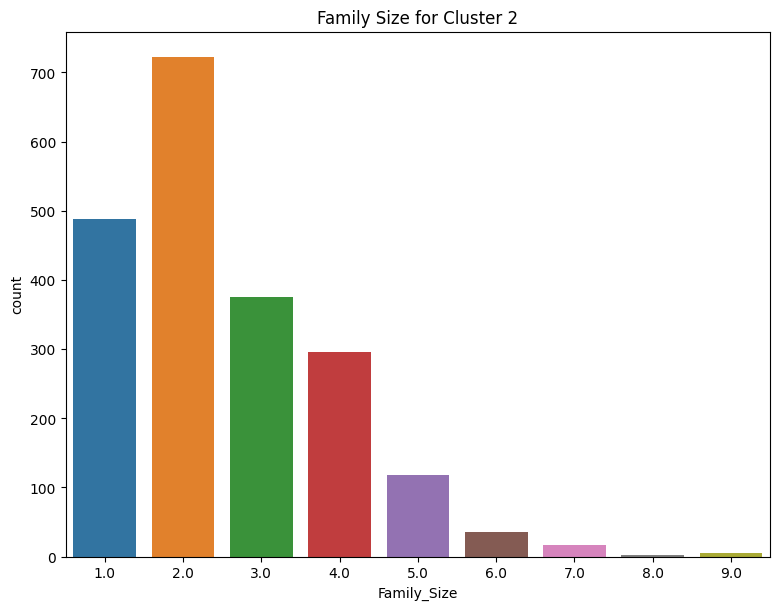

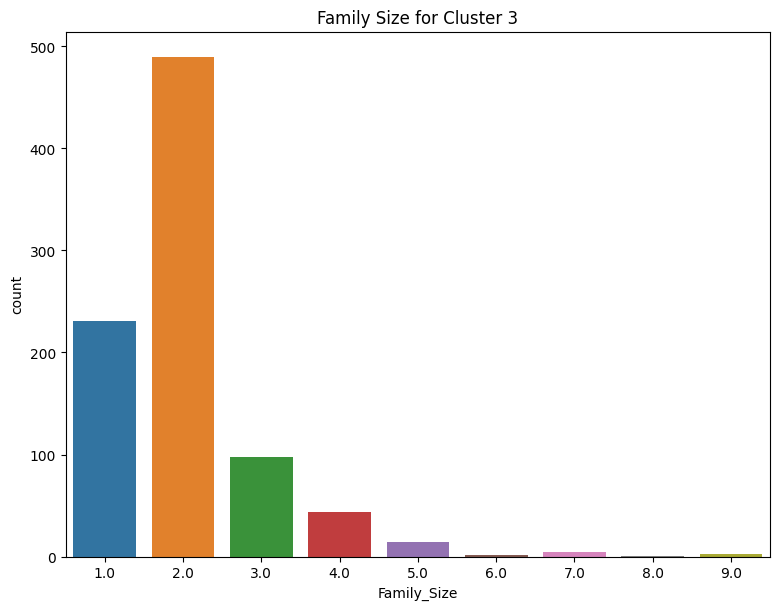

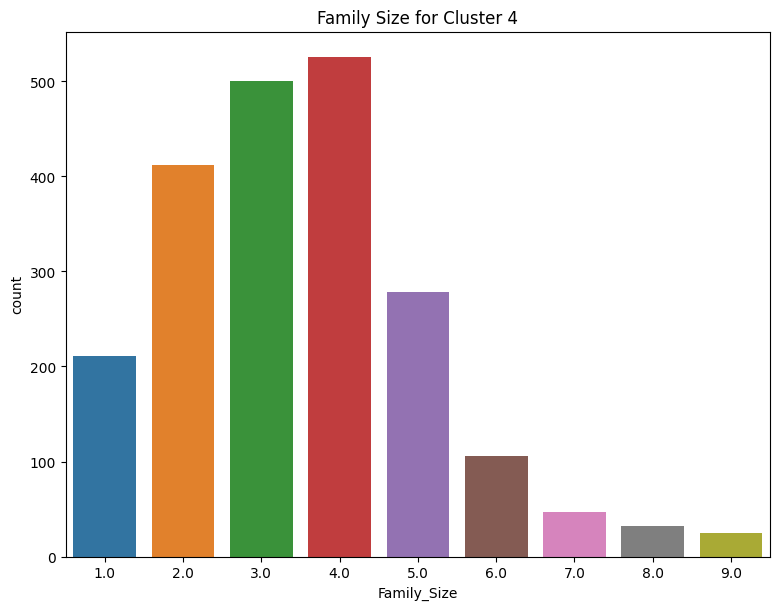

In [32]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    plt.title('Family Size for Cluster '+str(i+1) )
    df.query("cluster=="+str(i))
    sns.countplot(df.query("cluster=="+str(i)),x="Family_Size")